# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kaushini | Chandrachoodamani | K.C | 4 | 50% |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |



# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

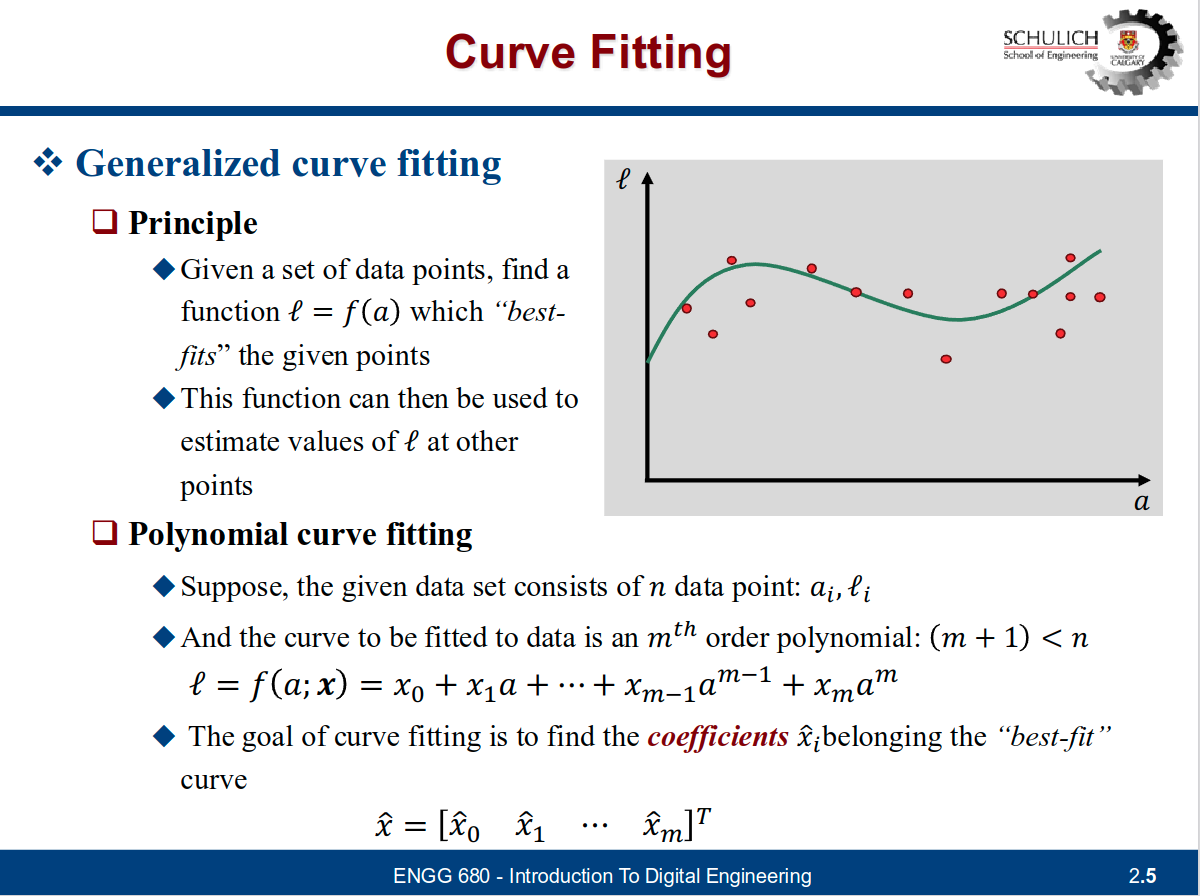

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
%cd engg680_2024_fall/Lab_Assignment2/
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

Mounted at /content/drive
/content/drive/MyDrive
/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2


In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


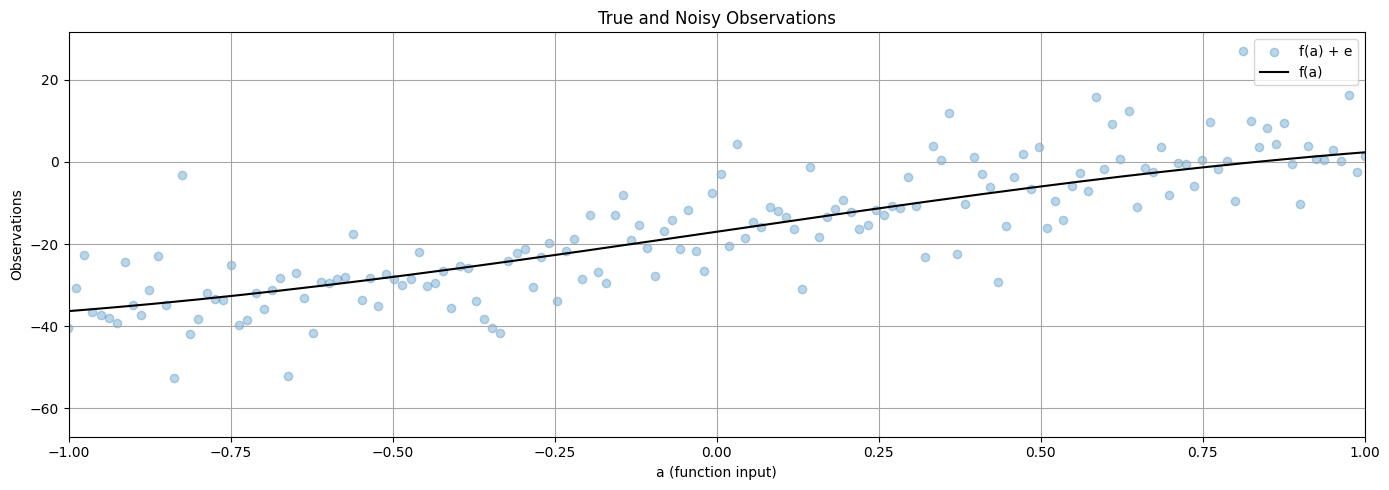

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label="f(a)", color='k')
ax.set_xlabel("a (function input)")
ax.set_ylabel("Observations")
ax.set_title("True and Noisy Observations")
ax.set_xlim([-1, 1])
ax.legend()

ax.grid(True, which='both', ls='-', color='0.65')
fig.tight_layout()


plt.show()

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

  # Step 1: Construct the design matrix A for polynomial regression (Vandermonde matrix)
    # Each row of A contains powers of the corresponding 'a' values
    A = np.vander(a, deg + 1, increasing=True)

    # Step 2: Perform the linear least square estimation using LSE formula
    # (A.T * P * A) * x = A.T * P * l, solve for x (the polynomial coefficients)

    # Compute A transpose times P (A^T * P)
    AtP = A.T @ P

    # Compute normal equation: (AtP @ A) * x = AtP @ l
    N = AtP @ A
    b = AtP @ l

    # Solve for x (the polynomial coefficients) using np.linalg.solve
    x = np.linalg.solve(N, b)

    # Step 3: Calculate observation residuals (v = l - A * x)
    v = l - A @ x

    # Step 4: Compute the a posteriori variance factor (apv)
    # apv = (v.T * P * v) / (n - deg - 1), where n is the number of observations
    apv = (v.T @ P @ v) / (len(l) - deg - 1)

    # Step 5: Compute the covariance matrix of the estimated coefficients (cov_x)
    cov_x = apv * np.linalg.inv(N)

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Define polynomial degrees
degrees = [1, 3, 5]

# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P, deg)
    results.append(result)

# Separate results for degree 1, 3, and 5
results_deg1, results_deg3, results_deg5 = results

# Testing: print the polynomial coefficients, APV, and covariance matrix for each degree
for deg, res in zip(degrees, results):
    x, cov_x, apv, v = res
    print(f"Degree {deg}:")
    print(f"  Polynomial Coefficients (x): {x}")
    print(f"  Covariance Matrix (Cov_x):\n{cov_x}\n")



Degree 1:
  Polynomial Coefficients (x): [-16.59352348   7.25633807]
  Covariance Matrix (Cov_x):
[[3.25485217e-01 3.36083382e-17]
 [3.36083382e-17 9.85406897e-02]]

Degree 3:
  Polynomial Coefficients (x): [-16.72496774  19.63961372   0.03979476  -2.08281013]
  Covariance Matrix (Cov_x):
[[ 2.97597234e-01  1.25310819e-16 -5.00544889e-02 -1.70673481e-17]
 [ 1.25310819e-16  2.50276449e-01 -2.18317337e-17 -3.53602826e-02]
 [-5.00544889e-02 -2.18317337e-17  1.51540027e-02  3.15360109e-18]
 [-1.70673481e-17 -3.53602826e-02  3.15360109e-18  5.94743723e-03]]

Degree 5:
  Polynomial Coefficients (x): [-1.65770980e+01  2.28207004e+01 -1.09433276e-01 -3.58096979e+00
  1.75697706e-02  1.36073672e-01]
  Covariance Matrix (Cov_x):
[[ 4.48309229e-01  1.45919540e-15 -2.11135021e-01 -5.80697323e-16
   1.91768063e-02  4.87813161e-17]
 [ 1.45919540e-15  7.38990309e-01 -1.30554523e-15 -2.68486029e-01
   1.49626561e-16  2.12894514e-02]
 [-2.11135021e-01 -1.30554523e-15  1.78983526e-01  5.41298127e-16
  -

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

# Extract the polynomial coefficients for each degree
x_deg1, x_deg3, x_deg5 = results[0][0], results[1][0], results[2][0]

# Reverse the order of the coefficients for the format of np.polyval
line_uw = np.polyval(x_deg1[::-1], a)    # Degree 1 (linear)
cubic_uw = np.polyval(x_deg3[::-1], a)   # Degree 3 (cubic)
quintic_uw = np.polyval(x_deg5[::-1], a) # Degree 5 (quintic)


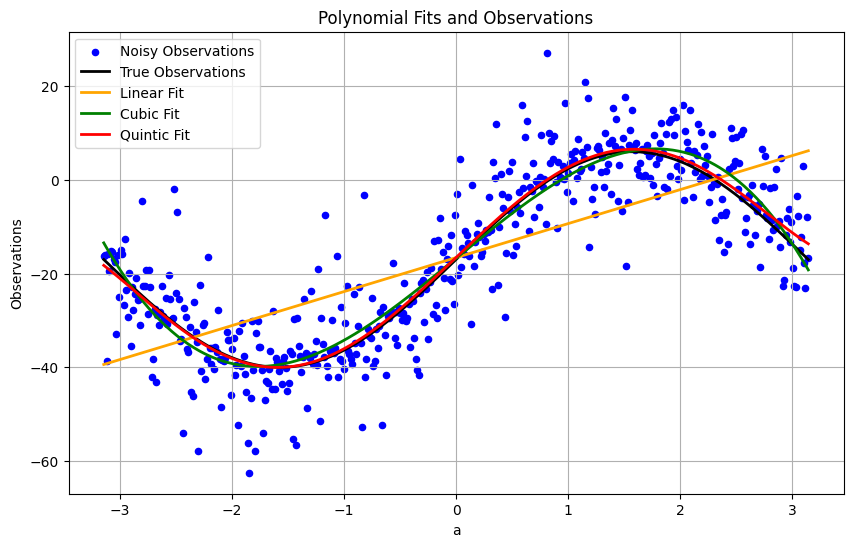

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)


# Plot the noisy and true observations
plt.figure(figsize=(10, 6))
plt.scatter(a, l, label='Noisy Observations', color='blue', s=20, marker='o')  # noisy data
plt.plot(a, l_true, label='True Observations', color='black', linewidth=2)      # true data

# Plot polynomial fits
plt.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
plt.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
plt.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Fits and Observations')
plt.legend()
plt.grid(True)


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
print("A posteriori variance factor for line:", results[0][2])
print("A posteriori variance factor for cubic:", results[1][2])
print("A posteriori variance factor for quintic:", results[2][2])


A posteriori variance factor for line: 162.742608604322
A posteriori variance factor for cubic: 66.13227783131883
A posteriori variance factor for quintic: 63.7583446301842


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
norm_line = np.linalg.norm(line_uw - l_true)    # Norm for linear fit
norm_cubic = np.linalg.norm(cubic_uw - l_true)  # Norm for cubic fit
norm_quintic = np.linalg.norm(quintic_uw - l_true)  # Norm for quintic fit

# Print the results
print(f"Norm between Linear Fit and True Observations: {norm_line}")
print(f"Norm between Cubic Fit and True Observations: {norm_cubic}")
print(f"Norm between Quintic Fit and True Observations: {norm_quintic}")

Norm between Linear Fit and True Observations: 229.0601679674409
Norm between Cubic Fit and True Observations: 38.285979929116664
Norm between Quintic Fit and True Observations: 17.369967196966478


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# Both the apv and norm decrease as the polynomial degree increases. Posterier Variance factor indicates the goodness of fit and the nrom values indicate the
# errors. Higher order polynomials have a better fit as well as least errors.



In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P1 = np.diag(1 / l_var)

Degree 1:
  Polynomial Coefficients (x): [-16.54496159   7.67854617]
  Covariance Matrix (Cov_x):
[[0.2391759  0.00093922]
 [0.00093922 0.07970217]]

Degree 3:
  Polynomial Coefficients (x): [-16.77797524  20.33157168  -0.03430166  -2.23356908]
  Covariance Matrix (Cov_x):
[[ 4.82927500e-02 -3.64626310e-04 -8.52860041e-03 -1.11048648e-05]
 [-3.64626310e-04  4.12770553e-02 -1.47079664e-04 -5.95126437e-03]
 [-8.52860041e-03 -1.47079664e-04  2.84554500e-03  5.63867793e-05]
 [-1.11048648e-05 -5.95126437e-03  5.63867793e-05  1.05097444e-03]]

Degree 5:
  Polynomial Coefficients (x): [-1.67951025e+01  2.26801815e+01 -7.07246017e-02 -3.49795817e+00
  8.12376456e-03  1.22547782e-01]
  Covariance Matrix (Cov_x):
[[ 6.95934072e-02 -6.42905748e-03 -3.75805296e-02  2.89968394e-03
   3.64303084e-03 -2.51408885e-04]
 [-6.42905748e-03  8.67927460e-02  4.98845497e-03 -3.32194024e-02
  -5.26606891e-04  2.73767204e-03]
 [-3.75805296e-02  4.98845497e-03  3.37493657e-02 -2.30339140e-03
  -3.74751719e-03  

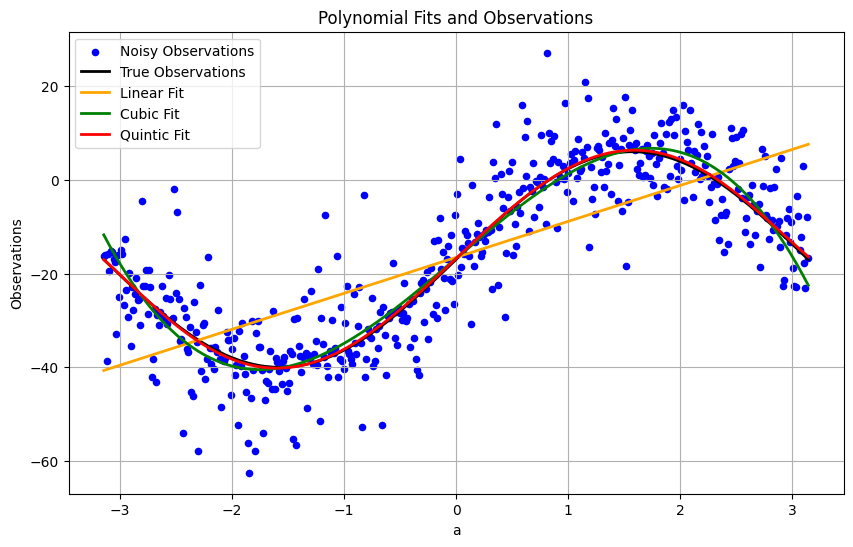

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)

# Step 6
# Define polynomial degrees
degrees = [1, 3, 5]

# Initialize lists to store results
results = []

# Loop through each degree, call the function, and store the results
for deg in degrees:
    result = fit_polynomial_curve(a, l, P1, deg)
    results.append(result)

# Separate results for degree 1, 3, and 5
results_deg1, results_deg3, results_deg5 = results

# Testing: print the polynomial coefficients, APV, and covariance matrix for each degree
for deg, res in zip(degrees, results):
    x, cov_x, apv, v = res
    print(f"Degree {deg}:")
    print(f"  Polynomial Coefficients (x): {x}")
    print(f"  Covariance Matrix (Cov_x):\n{cov_x}\n")

# Step 7
# Extract the polynomial coefficients for each degree
x_deg1, x_deg3, x_deg5 = results[0][0], results[1][0], results[2][0]

# Reverse the order of the coefficients for the format of np.polyval
line_uw = np.polyval(x_deg1[::-1], a)    # Degree 1 (linear)
cubic_uw = np.polyval(x_deg3[::-1], a)   # Degree 3 (cubic)
quintic_uw = np.polyval(x_deg5[::-1], a) # Degree 5 (quintic)

# Step 8
# Plot the noisy and true observations
plt.figure(figsize=(10, 6))
plt.scatter(a, l, label='Noisy Observations', color='blue', s=20, marker='o')  # noisy data
plt.plot(a, l_true, label='True Observations', color='black', linewidth=2)      # true data

# Plot polynomial fits
plt.plot(a, line_uw, label='Linear Fit', color='orange', linewidth=2)
plt.plot(a, cubic_uw, label='Cubic Fit', color='green', linewidth=2)
plt.plot(a, quintic_uw, label='Quintic Fit', color='red', linewidth=2)

plt.xlabel('a')
plt.ylabel('Observations')
plt.title('Polynomial Fits and Observations')
plt.legend()
plt.grid(True)


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# Step 9
print("A posteriori variance factor for line:", results[0][2])
print("A posteriori variance factor for cubic:", results[1][2])
print("A posteriori variance factor for quintic:", results[2][2])

# Step 10
norm_line = np.linalg.norm(line_uw - l_true)    # Norm for linear fit
norm_cubic = np.linalg.norm(cubic_uw - l_true)  # Norm for cubic fit
norm_quintic = np.linalg.norm(quintic_uw - l_true)  # Norm for quintic fit

# Print the results
print(f"Norm between Linear Fit and True Observations: {norm_line}")
print(f"Norm between Cubic Fit and True Observations: {norm_cubic}")
print(f"Norm between Quintic Fit and True Observations: {norm_quintic}")


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# The weighted LSE will generally have a lower apv than unweighted LSE, indicating a better fit, especially when there are significant differences
# in the reliability of the observations.
# The weighted LSE will generally show a lower norm than the unweighted LSE, indicating that it has a smaller overall error,
# especially when some observations are noisy or unreliable.

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

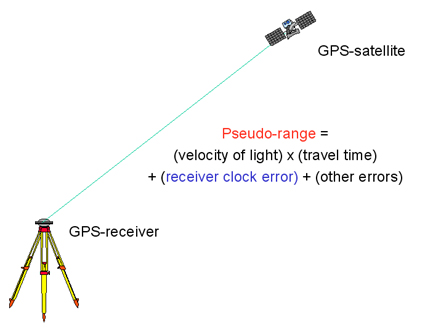

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [2]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/
%cd engg680_2024_fall/Lab_Assignment2/
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2


In [3]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = pseudorange.shape[0]
m = sat_pos.shape[0]

print(f"Number of measurements (n): {n}")
print(f"Number of states (m): {m}")


Number of measurements (n): 11
Number of states (m): 11


In [4]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
import numpy as np
P = np.eye(n)

In [5]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)
print("Initial state vector x_0:")
print(x_0)

Initial state vector x_0:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [8]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
import numpy as np
delta = np.ones((4,))  # Corrections array, assuming a 3D position (x, y, z) and receiver clock bias
i = 0  # Loop counter
results = {
    'weights': [],  # To store weights or other relevant data
    'corrections': [],  # To store correction values over iterations
    'errors': [],  # To store error positions
    'iterations': []  # To store iteration values
}

In [9]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)


def euclidean_norm(receiver_pos, satellite_pos):
  """
  Computes the Euclidean distance between a receiver and multiple satellites.

  Args:
    receiver_pos: A NumPy array representing the receiver's position (x, y, z).
    satellite_pos: A NumPy array representing the satellites' positions (x, y, z)
                   with each row representing a satellite.

  Returns:
    A NumPy array containing the distances between the receiver and each satellite.
  """
  distances = np.sqrt(np.sum((satellite_pos - receiver_pos)**2, axis=1))
  return distances

# Test the function with GroundTruth and sat_pos
receiver_pos = GroundTruth
satellite_pos = sat_pos[:, :3]  # Assuming the first 3 columns are the satellite positions (x, y, z)

# Calculate distances
distances = euclidean_norm(receiver_pos, satellite_pos)

print("Distances between the receiver and satellites:")
print(distances)



Distances between the receiver and satellites:
[31778907.87343488 26162211.64338617 30172506.44209725 12558720.14000551
 29072284.79804634 11486668.56318926 21359642.12077169 20648366.5478712
 19875237.00966888 14290524.89137949 19303757.42316194]


In [12]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)


def design_matrix(r_pos, s_pos, rho):
    """
    Computes the design matrix A for the LSE problem.

    Args:
        r_pos: A NumPy array representing the receiver's estimated position (x, y, z).
        s_pos: A NumPy array representing the satellites' positions (x, y, z) with
               each row representing a satellite.
        rho: A NumPy array containing the geometric distances between the receiver and
             each satellite.

    Returns:
        A NumPy array representing the design matrix A.
    """
    n = s_pos.shape[0]  # Number of satellites
    A = np.zeros((n, 4))  # Initialize design matrix with zeros

    for i in range(n):
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / rho[i]  # Partial derivative with respect to x
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / rho[i]  # Partial derivative with respect to y
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / rho[i]  # Partial derivative with respect to z
        A[i, 3] = 1  # Partial derivative with respect to clock bias

    return A

# Test the function with the provided receiver position, satellite positions, and distances
A = design_matrix(GroundTruth, sat_pos[:, :3], distances)

print("Design matrix A:")
print(A)



Design matrix A:
[[-0.0514019  -0.28108011  0.95830674  1.        ]
 [-0.06243728 -0.05702771  0.9964183   1.        ]
 [-0.0541387  -0.46477675  0.88377122  1.        ]
 [-0.13006934  0.99007968  0.05314319  1.        ]
 [-0.05618775  0.36671906  0.92863344  1.        ]
 [-0.14220898 -0.10585393 -0.98416033  1.        ]
 [-0.07647639 -0.91593737  0.39396713  1.        ]
 [-0.07911102 -0.96489353  0.25044344  1.        ]
 [-0.08218847  0.78466528  0.61444728  1.        ]
 [-0.11430765  0.85927738 -0.4985741   1.        ]
 [-0.08462173  0.20868408  0.9743152   1.        ]]


In [15]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

import numpy as np

# Step 9: Start the iteration for the LSE

# Number of states (x, y, z, and clock bias)
m = 4  # 4 states

# Number of measurements (from pseudorange)
n = pseudorange.shape[0]  # Number of pseudorange measurements

# Define convergence threshold for L2-norm of position corrections
convergence_threshold = 0.001  # Acceptable for assignment, 0.1 meters

# Initial state estimate (use GroundTruth as a better initial guess for x, y, z)
# Start with a reasonable initial guess for clock bias
x_hat = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918, 0.001])  # Small initial clock bias

# Initialize corrections array delta with large values
delta = np.ones(m)  # Large values to start the loop

# Identity weight matrix P
P = np.eye(n)

# Initialize iteration counter
i = 0
max_iterations = 50  # Keep the max iterations reasonable for quicker convergence

# Arrays to store data for analysis
arr_w = []
arr_delta = []
arr_err_pos = []
arr_i = []

# Start the iteration loop
while np.linalg.norm(delta[:3]) >= convergence_threshold and i < max_iterations:

    # Step 1: Compute geometric distances (rho) between satellites and receiver
    rho = euclidean_norm(x_hat[:3], sat_pos[:, :3])

    # Step 2: Compute the design matrix A
    A = design_matrix(x_hat[:3], sat_pos, rho)

    # Step 3: Compute predicted pseudorange observations (rho + clock bias)
    estimated_pseudorange = rho + x_hat[3]

    # Step 4: Compute the misclosure array w (True observations - Predicted observations)
    pseudorange_measurements = pseudorange[:, 0]  # True observations
    w = pseudorange_measurements - estimated_pseudorange

    # Step 5: Compute the L2-norm between the predicted and true observations
    l2_norm = np.linalg.norm(w)

    # Check for convergence based on L2-norm of misclosures
    if l2_norm < convergence_threshold:
        print(f"Convergence achieved at iteration {i} based on L2-norm.")
        break

    # Step 6: Add a moderate damping factor (reduce to avoid over-regularization)
    damping_factor = 1e-8 * max(1, np.linalg.cond(A.T @ P @ A))
    ATA = A.T @ P @ A + np.eye(A.shape[1]) * damping_factor

    # Step 7: Compute corrections delta
    delta = np.linalg.inv(ATA) @ A.T @ P @ w

    # Step 8: Update the state estimate with corrections
    x_hat = x_hat + delta

    # Step 9: Compute position error relative to ground truth
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Step 10: Update the iteration counter
    i += 1

    # Step 11: Store values for analysis
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence or reaching max iterations, compute A Posteriori Variance of Unit Weight
df = n - m
residuals = w.T @ P @ w
apv = residuals / df  # A Posteriori Variance of Unit Weight

# Compute the Covariance matrix of estimated states
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

# Display final results
print("Final estimated state:", x_hat)
print("Position error:", err_pos)
print("A Posteriori Variance of Unit Weight:", apv)
print("Covariance matrix of estimated states:\n", C_x_hat)












Final estimated state: [-1.66033318e+08 -1.39362483e+06 -4.36600977e+06 -1.67117737e+08]
Position error: 164679193.16047606
A Posteriori Variance of Unit Weight: 162809715697.1517
Covariance matrix of estimated states:
 [[4.01847947e+15 7.70135147e+10 8.88247020e+10 3.99230959e+15]
 [7.70135147e+10 2.70312916e+12 4.29116343e+11 4.68015576e+10]
 [8.88247020e+10 4.29116343e+11 2.21014043e+12 4.32224059e+10]
 [3.99230959e+15 4.68015576e+10 4.32224059e+10 3.96632602e+15]]


In [16]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated states:", x_hat)
print("Corrections array (delta):", delta)
print("Estimated measurements residuals (w):", w)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance matrix of estimated states (C_x_hat):\n", C_x_hat)
print("Number of iterations:", i)
print("3-D position errors:", err_pos)



Estimated states: [-1.66033318e+08 -1.39362483e+06 -4.36600977e+06 -1.67117737e+08]
Corrections array (delta): [-3.18343863e+05 -1.74905221e+01 -1.97738137e+01 -3.16276189e+05]
Estimated measurements residuals (w): [-389174.46833324  240350.92021823 -233869.20310557  211686.05914056
 -353889.37094089 -195110.92391866  182826.52094528   95970.26009136
  102415.07298422 -360666.9888936   696006.87877342]
A Posteriori Variance of Unit Weight (apv): 162809715697.1517
Covariance matrix of estimated states (C_x_hat):
 [[4.01847947e+15 7.70135147e+10 8.88247020e+10 3.99230959e+15]
 [7.70135147e+10 2.70312916e+12 4.29116343e+11 4.68015576e+10]
 [8.88247020e+10 4.29116343e+11 2.21014043e+12 4.32224059e+10]
 [3.99230959e+15 4.68015576e+10 4.32224059e+10 3.96632602e+15]]
Number of iterations: 50
3-D position errors: 164679193.16047606


In [17]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
# The A Posteriori Variance of Unit Weight (apv) provides a measure of the overall uncertainty in the estimates
# after considering the residuals from the least squares adjustments. A lower value of apv indicates a better fit,
# meaning that the estimated states are closer to the true measurements with less variability.

# The Covariance matrix of estimated states (C_x_hat) offers insights into the uncertainties associated with each
# estimated parameter. The diagonal elements of this matrix represent the variance of each state estimate,
# while the off-diagonal elements indicate the correlation between different state estimates. A smaller
# variance suggests higher confidence in the estimates, while large values imply greater uncertainty.

# Together, these two metrics help assess the quality of the positioning solution, guiding further
# improvements or adjustments to the model.

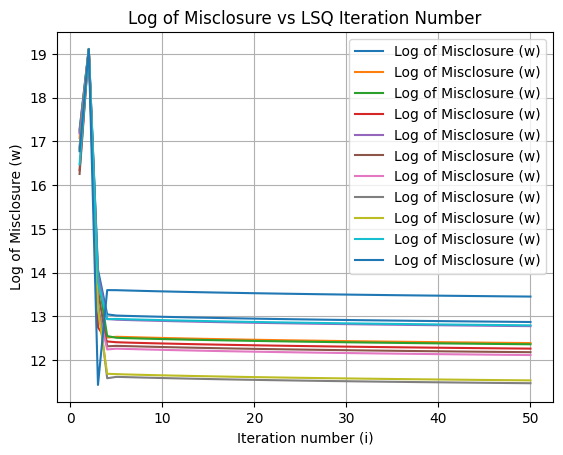

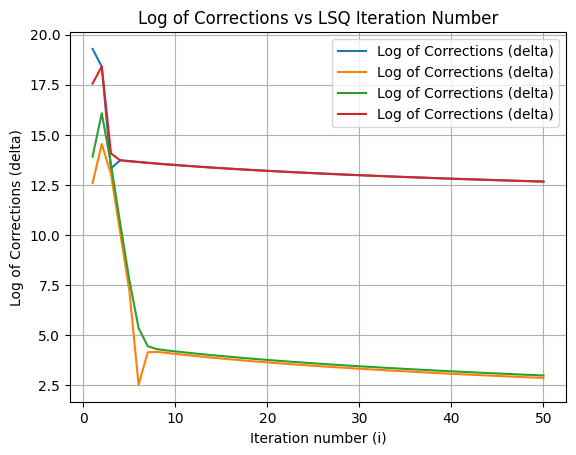

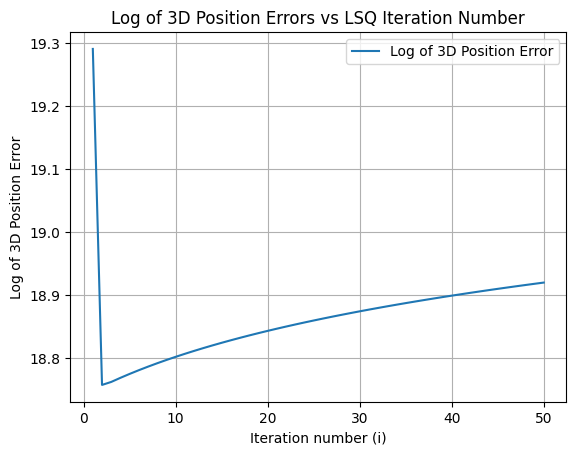

In [19]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_w)), label='Log of Misclosure (w)')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Misclosure (w)')
plt.title('Log of Misclosure vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()
# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_delta)), label='Log of Corrections (delta)')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of Corrections (delta)')
plt.title('Log of Corrections vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.figure()
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), label='Log of 3D Position Error')
plt.xlabel('Iteration number (i)')
plt.ylabel('Log of 3D Position Error')
plt.title('Log of 3D Position Errors vs LSQ Iteration Number')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
# Step 13:

# 1. Log of Misclosure vs LSQ Iteration Number:
# Shows a decreasing trend, indicating that the misclosure decreases with each iteration, suggesting convergence of the solution.

# 2. Log of Corrections (delta) vs LSQ Iteration Number:
# The corrections diminish as iterations progress, reflecting smaller adjustments needed as the solution stabilizes.

# 3. Log of 3D Position Errors vs LSQ Iteration Number:
# Position errors decrease with iterations, showing improved accuracy of the 3D position estimate over time.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
